<a href="https://colab.research.google.com/github/RufusRubin/Time-Series-Analysis-Assignment/blob/main/Assignment1/TSA_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the data**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/gold_price_data.csv",index_col= "Date")

In [3]:
data

,Value
Date,
1970-01-01,35.20
1970-04-01,35.10
1970-07-01,35.40
1970-10-01,36.20
1971-01-01,37.40
...,...
2020-03-09,1672.50
2020-03-10,1655.70
2020-03-11,1653.75


**Plot the figure**

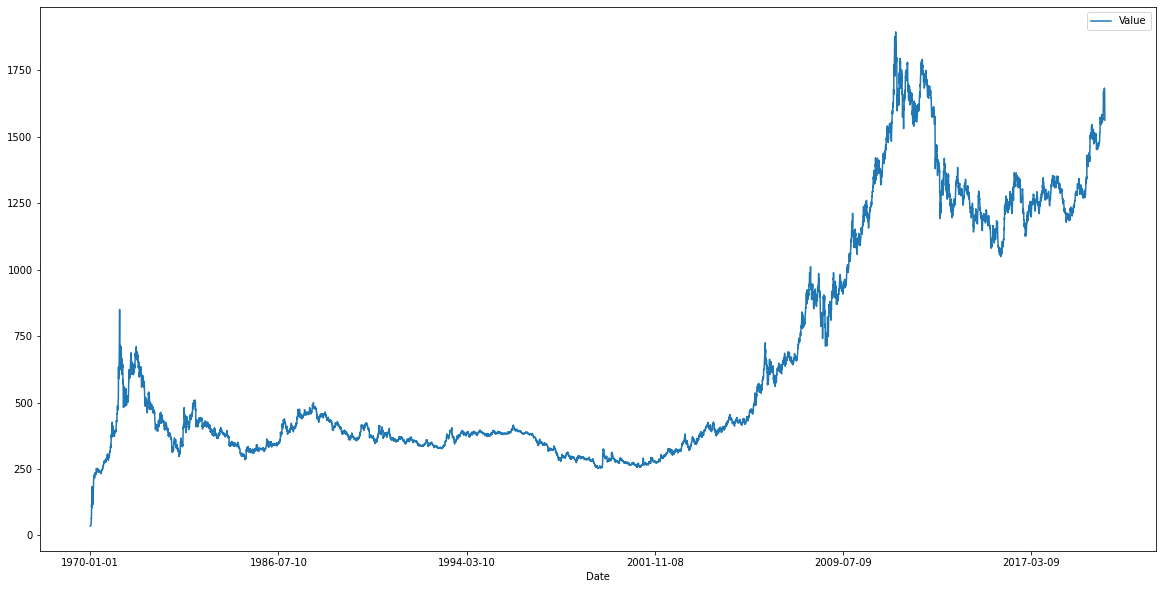

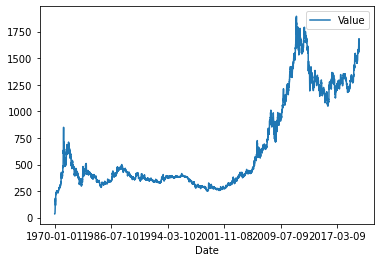

In [4]:
import matplotlib.pyplot as pyplot
data.plot(figsize=(20,10))
data.plot()

**Plot the histogram**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d58e2ea90>]],
      dtype=object)

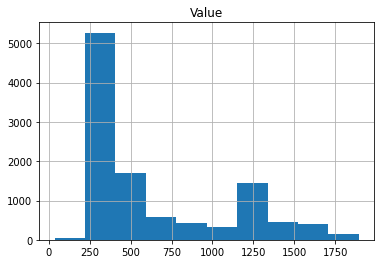

In [5]:
data.hist()

**Plot the acf**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


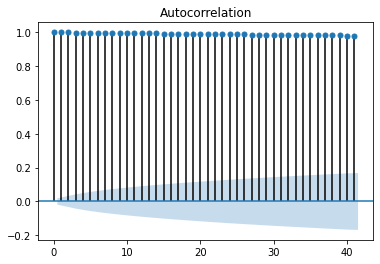

In [6]:
import matplotlib.pyplot as pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
pyplot.show()


**Plot the Pacf**

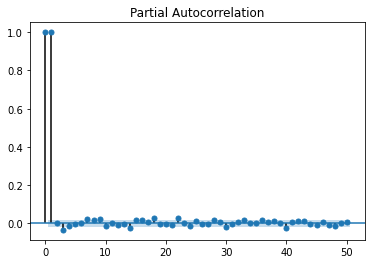

In [7]:
import matplotlib.pyplot as pyplot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data, lags=50)
pyplot.show()

**Mean and Variance**

In [8]:
x=data.values
split= round(len(x)/2)
x1= x[0:split]
x2= x[split:]
mean1=x1.mean()
mean2=x2.mean()
var1=x1.var()
var2=x2.var()

In [9]:
print(mean1,mean2)

381.3514812754912 925.8922677544965


In [10]:
print(var1,var2)

6166.433118365704 222321.8980331106


AD-fuller Test(test for stationary)

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
data=pd.read_csv("/content/gold_price_data.csv",index_col= "Date",squeeze=True)

In [13]:
x=data.values

In [14]:
result= adfuller(x)

In [15]:
result

(-0.07112124453813388,
 0.9522400769147396,
 39,
 10747,
 {'1%': -3.4309586221840513,
  '10%': -2.566913171245489,
  '5%': -2.861808976860248},
 77621.49868017703)

#**Converting non stationary data into stationary data**




#**1.Log transform**

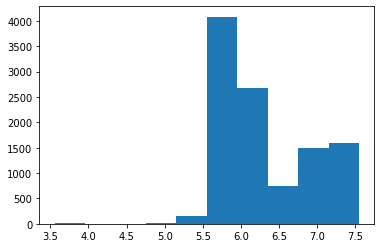

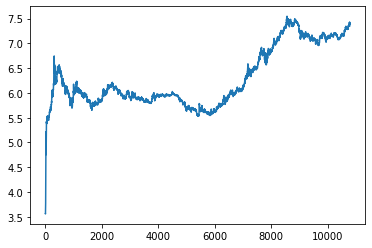

In [16]:
from numpy import log
x= data.values
x=log(x)
pyplot.hist(x)
pyplot.show()
pyplot.plot(x)
pyplot.show()


**Test for stationarity**  

>adfuller



In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
data =pd.read_csv("/content/gold_price_data.csv",index_col='Date',squeeze=True)
x=data.values
result=adfuller(x)
result

(-0.07112124453813388,
 0.9522400769147396,
 39,
 10747,
 {'1%': -3.4309586221840513,
  '10%': -2.566913171245489,
  '5%': -2.861808976860248},
 77621.49868017703)

#**2. Square root transform**

In [19]:
data =pd.read_csv("/content/gold_price_data.csv",index_col='Date')

In [20]:
from numpy import sqrt

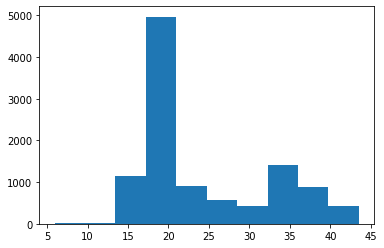

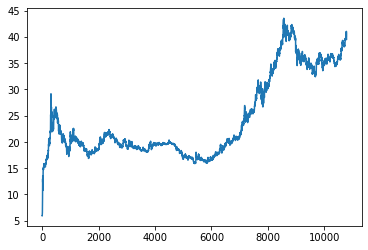

In [21]:
x= data.values
x=sqrt(x)
pyplot.hist(x)
pyplot.show()
pyplot.plot(x)
pyplot.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
data =pd.read_csv("/content/gold_price_data.csv",index_col='Date',squeeze=True)
x=data.values
result=adfuller(x)
result

(-0.07112124453813388,
 0.9522400769147396,
 39,
 10747,
 {'1%': -3.4309586221840513,
  '10%': -2.566913171245489,
  '5%': -2.861808976860248},
 77621.49868017703)

#**3. Differencing**

In [22]:
data =pd.read_csv("/content/gold_price_data.csv",index_col='Date')

In [23]:
from numpy import diff


In [45]:
data['diff_1'] = data['Value'].diff().fillna(0)

In [46]:
data['diff_2'] = data['Value'].diff(periods=2).fillna(0)


In [35]:
data=data.dropna()


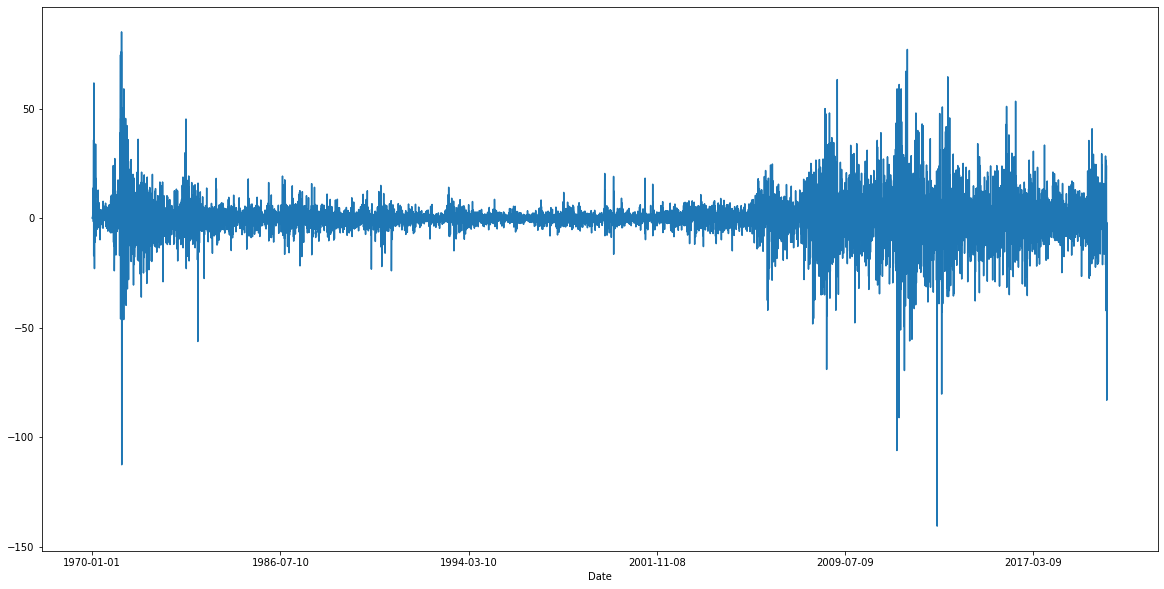

In [52]:
data["diff_1"].plot(figsize=(20,10))

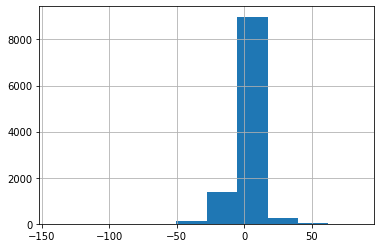

In [56]:
data["diff_1"].hist()

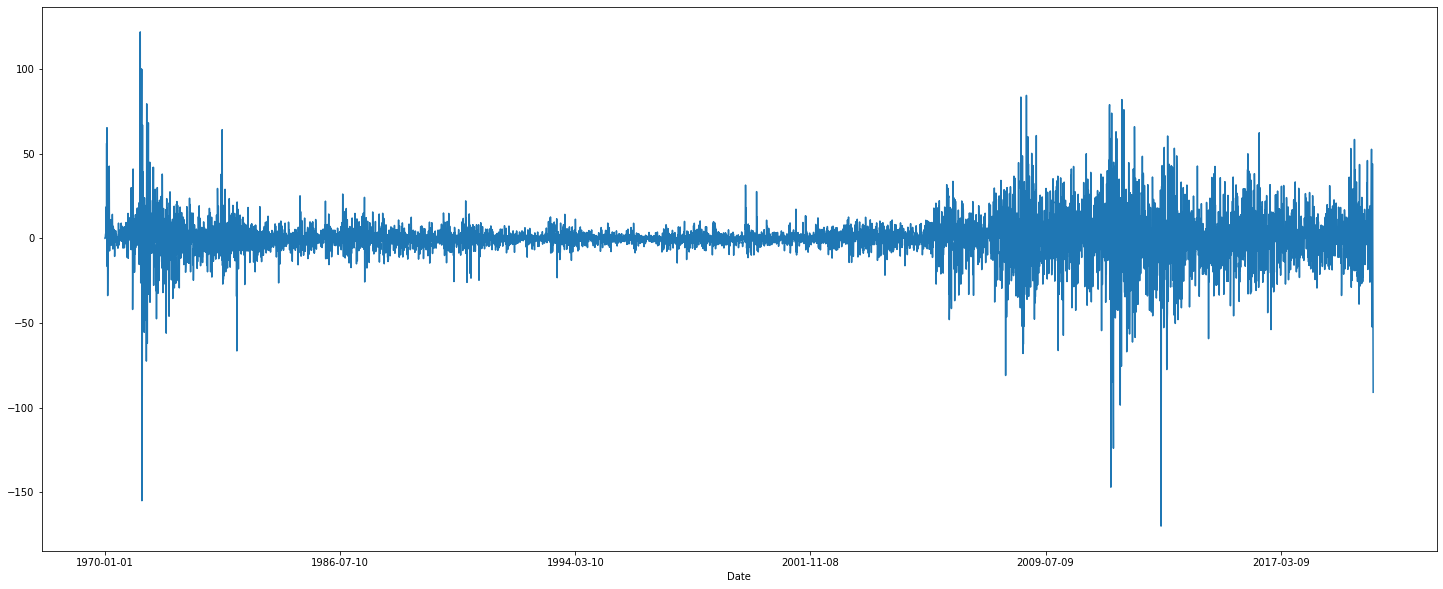

In [48]:
data["diff_2"].plot(figsize=(25,10))

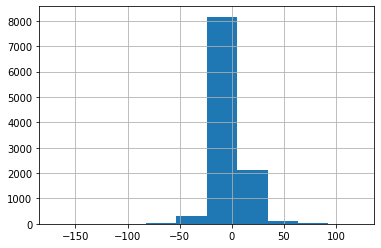

In [57]:
data["diff_2"].hist()

ADfuller test

In [50]:
x=data['diff_1'].values
res=adfuller(x)
res

(-17.607789008965383,
 3.8929948100220055e-30,
 38,
 10748,
 {'1%': -3.4309585655439663,
  '10%': -2.5669131579224924,
  '5%': -2.8618089518310725},
 77619.5037577784)

In [51]:
x=data['diff_2'].values
res=adfuller(x)
res

(-17.68084100277778,
 3.608795054845787e-30,
 39,
 10747,
 {'1%': -3.4309586221840513,
  '10%': -2.566913171245489,
  '5%': -2.861808976860248},
 77907.95790370526)